# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import pandas as pd
from sklearn.metrics import mean_squared_error
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_light

In [2]:
penguins = sns.load_dataset("penguins")
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [3]:
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)
print(penguins.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            39.1           18.7              181.0       3750.0   
1            39.5           17.4              186.0       3800.0   
2            40.3           18.0              195.0       3250.0   
3             NaN            NaN                NaN          NaN   
4            36.7           19.3              193.0       3450.0   

   species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  sex_Male  
0                  0               0             0                 1         1  
1                  0               0             0                 1         0  
2                  0               0             0                 1         0  
3                  0               0             0                 1         0  
4                  0               0             0                 1         0  


In [4]:
penguins.isnull().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
species_Chinstrap    0
species_Gentoo       0
island_Dream         0
island_Torgersen     0
sex_Male             0
dtype: int64

In [5]:
penguins = penguins.dropna()
penguins.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
species_Chinstrap    0
species_Gentoo       0
island_Dream         0
island_Torgersen     0
sex_Male             0
dtype: int64

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

## Multiple Linear Regression

In [6]:
X = penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
errors = []

In [8]:
best_linear_model = LinearRegression()
best_linear_model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred_linear_train = best_linear_model.predict(X_train)
y_pred_linear_test = best_linear_model.predict(X_test)
error_linear_train = mean_squared_error(y_train, y_pred_linear_train)
error_linear_test = mean_squared_error(y_test, y_pred_linear_test)

In [10]:
errors.append({'Model': 'Linear Regression', 'Error Type': 'Training Error', 'Error': error_linear_train})
errors.append({'Model': 'Linear Regression', 'Error Type': 'Test Error', 'Error': error_linear_test})

## kNN = 5

In [11]:
X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
knn_model_5 = KNeighborsRegressor(n_neighbors=5)
knn_model_5.fit(X_train, y_train)

KNeighborsRegressor()

In [14]:
y_pred_knn_5_train = knn_model_5.predict(X_train)
y_pred_knn_5_test = knn_model_5.predict(X_test)
error_knn_5_train = mean_squared_error(y_train, y_pred_knn_5_train)
error_knn_5_test = mean_squared_error(y_test, y_pred_knn_5_test)

In [15]:
errors.append({'Model': 'KNN 5', 'Error Type': 'Training Error', 'Error': error_knn_5_train})
errors.append({'Model':'KNN 5', 'Error Type': 'Test Error', 'Error': error_knn_5_test})

## kNN = 15

In [16]:
knn_model_15 = KNeighborsRegressor(n_neighbors=15)
knn_model_15.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [17]:
y_pred_knn_15_train = knn_model_15.predict(X_train)
y_pred_knn_15_test = knn_model_15.predict(X_test)
error_knn_15_train = mean_squared_error(y_train, y_pred_knn_15_train)
error_knn_15_test = mean_squared_error(y_test, y_pred_knn_15_test)

In [18]:
errors.append({'Model': 'KNN 15', 'Error Type': 'Training Error', 'Error': error_knn_15_train})
errors.append({'Model':'KNN 15', 'Error Type': 'Test Error', 'Error': error_knn_15_test})

## Decision Tree

In [19]:
decision_tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [20]:
y_pred_tree_train = decision_tree_model.predict(X_train)
y_pred_tree_test = decision_tree_model.predict(X_test)
error_tree_train = mean_squared_error(y_train, y_pred_tree_train)
error_tree_test = mean_squared_error(y_test, y_pred_tree_test)

In [21]:
errors.append({'Model': 'Decision Tree', 'Error Type': 'Training Error', 'Error': error_tree_train})
errors.append({'Model': 'Decision Tree', 'Error Type': 'Test Error', 'Error': error_tree_test})

## Plot of Errors

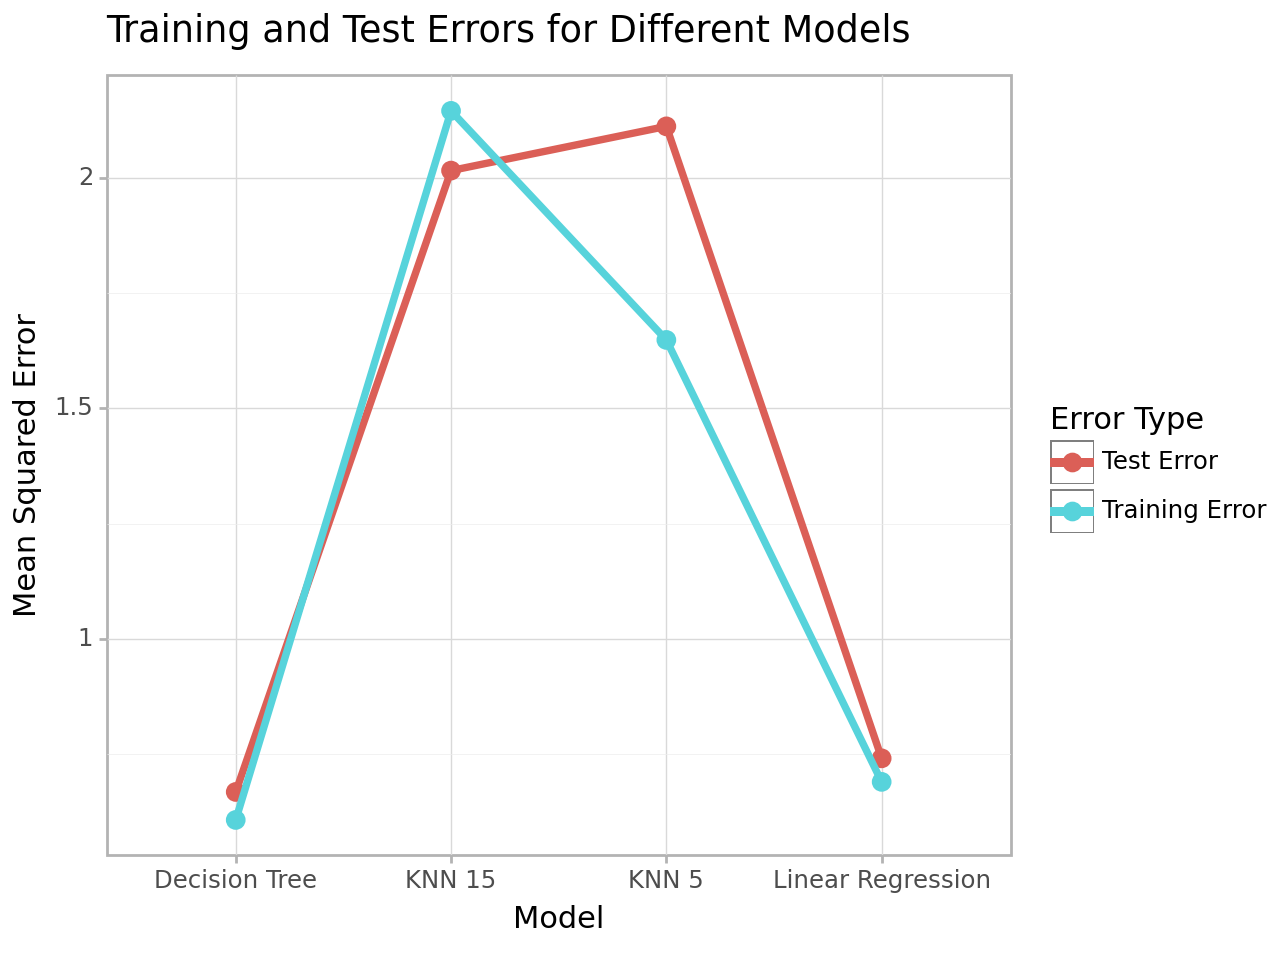

In [22]:
error_data = pd.DataFrame(errors)

plot = (ggplot(error_data, aes(x='Model', y='Error', color='Error Type', group='Error Type')) +
        geom_point(size=3) +
        geom_line(size=1.5) +
        labs(title='Training and Test Errors for Different Models', y='Mean Squared Error') +
        theme_light()
       )

print(plot)

my best model was my decision tree